In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
excel_jogos = pd.read_csv("steam-store-games/steam.csv")
excel_requisitos = pd.read_csv("steam-store-games/steam_requirements_data.csv")

In [3]:
excel_jogos

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


# Generos existentes no dataset

In [4]:
generos = excel_jogos.genres.str.cat(sep=";")
generos = generos.split(";")
lista_generos = []
for i in generos:
    if i not in lista_generos:
        lista_generos.append(i)
lista_software = ["Animation & Modeling", "Web Publishing", "Design & Illustration", "Early Access", "Utilities", "Video Production", "Nudity", "Photo Editing", "Accounting", "Game Development", "Free to Play", "Audio Production", "Tutorial", "Sexual Content", "Education", "Software Training", "Documentary"]
for i in lista_software:
    if i in lista_generos:
        lista_generos.remove(i)
lista_generos

['Action',
 'Strategy',
 'Adventure',
 'Indie',
 'RPG',
 'Casual',
 'Simulation',
 'Racing',
 'Violent',
 'Massively Multiplayer',
 'Sports',
 'Gore']

Foi pesquisado sobre os generos existentes para remover os que não eram relacionadas a jogos, como por exemplo "Web Publishing", a fim de focar apenas nos jogos

# DF só com jogos

In [40]:
for i in lista_software:
    excel_only_jogos = excel_jogos[~excel_jogos.genres.str.contains(i)]

utilizou a lista criada com os generos realmente de jogos para a criação desse DF

# Porcentagem dos feedbacks positivos e negativos

In [42]:
excel_only_jogos["ratings"] = excel_only_jogos["positive_ratings"] + excel_only_jogos["negative_ratings"]
excel_only_jogos["Percent_positive"] = excel_only_jogos["positive_ratings"]/excel_only_jogos["ratings"]
excel_only_jogos["Percent_negative"] = excel_only_jogos["negative_ratings"]/excel_only_jogos["ratings"]

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

Foi feito a porcentagem dos feedbacks para evitar que jogos lançados a muito tempo tenham maior número de feedback, tanto positivo quanto negativo, dessa forma, a porcentagem considera apenas a relação entre os positivos, negativos e o total 

# Data de lançamento em anos

In [7]:
l1 = []
l2 = []
l3 = []

for string in excel_only_jogos["release_date"]:
    l1.append(string.split("-"))

for lista in l1:
    l2.append(int(lista[0]))

for e in l2:
    l3.append(2019 - e)
excel_only_jogos["Idade"] = l3

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


No dataset, a idade de lançamento se dava por uma string contendo o ano, mês e dia, como por exemplo "2001-02-04", dessa forma, transformamos essa string em um número que seria à quanto tempo o jogo foi lançado

# Número de categorias

In [8]:
n_cat = []
for i in excel_only_jogos.categories:
    n_cat.append(i.count(";")+1)
excel_only_jogos["n_cat"] = pd.Series(n_cat)

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Foi calculado o número de categorias para analisar jogos que podem ser considerados mais "Completos" por conter mais categorias e jogos mais "Simples" por ter poucas categorias

In [10]:
excel_only_jogos.corr()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,ratings,Percent_positive,Percent_negative,Idade,n_cat
appid,1.000000,-0.116891,-0.087735,0.040519,-0.070888,-0.052197,-0.070234,-0.048306,-0.152103,-0.069987,-0.021998,0.021998,-0.857047,-0.249778
english,-0.116891,1.000000,0.002861,0.014122,0.006002,0.005705,0.000339,-0.003416,0.007717,0.006171,-0.017594,0.017594,0.086890,0.072293
required_age,-0.087735,0.002861,1.000000,-0.005460,0.060417,0.057599,0.034422,0.014748,0.120357,0.062154,0.010249,-0.010249,0.078862,0.048619
achievements,0.040519,0.014122,-0.005460,1.000000,0.006058,0.003577,0.014175,0.009957,-0.007997,0.005812,-0.022424,0.022424,-0.034247,0.003168
positive_ratings,-0.070888,0.006002,0.060417,0.006058,1.000000,0.762804,0.157897,0.035776,0.036109,0.992340,0.030239,-0.030239,0.064383,0.071055
negative_ratings,-0.052197,0.005705,0.057599,0.003577,0.762804,1.000000,0.161140,0.047887,0.051258,0.836842,0.000774,-0.000774,0.034859,0.051241
average_playtime,-0.070234,0.000339,0.034422,0.014175,0.157897,0.161140,1.000000,0.914900,0.049242,0.164463,0.020404,-0.020404,0.052995,0.049698
median_playtime,-0.048306,-0.003416,0.014748,0.009957,0.035776,0.047887,0.914900,1.000000,0.036610,0.039437,0.013231,-0.013231,0.034507,0.027731
price,-0.152103,0.007717,0.120357,-0.007997,0.036109,0.051258,0.049242,0.036610,1.000000,0.040363,0.076447,-0.076447,0.057286,0.183862
ratings,-0.069987,0.006171,0.062154,0.005812,0.992340,0.836842,0.164463,0.039437,0.040363,1.000000,0.025749,-0.025749,0.061167,0.069945


# Excluindo jogos que não foram jogados (horas médias = 0)

In [11]:
excel_only_jogos = excel_only_jogos.loc[excel_only_jogos.average_playtime != 0]

# Tempo médio por gênero

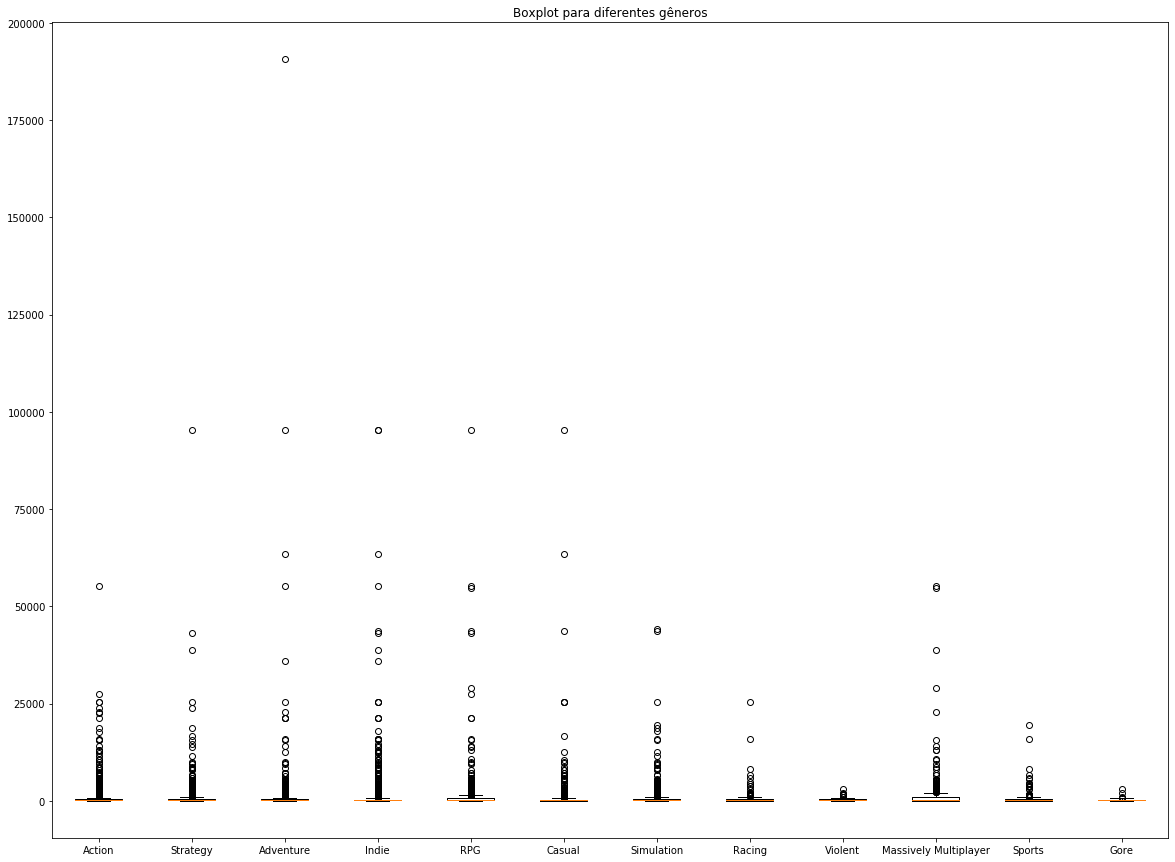

In [12]:
t_medio = excel_only_jogos
data = [t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].average_playtime for i in lista_generos]
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Boxplot para diferentes gêneros')
ax.boxplot(data, labels = lista_generos)
plt.show()

# Log Tempo médio por gênero

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


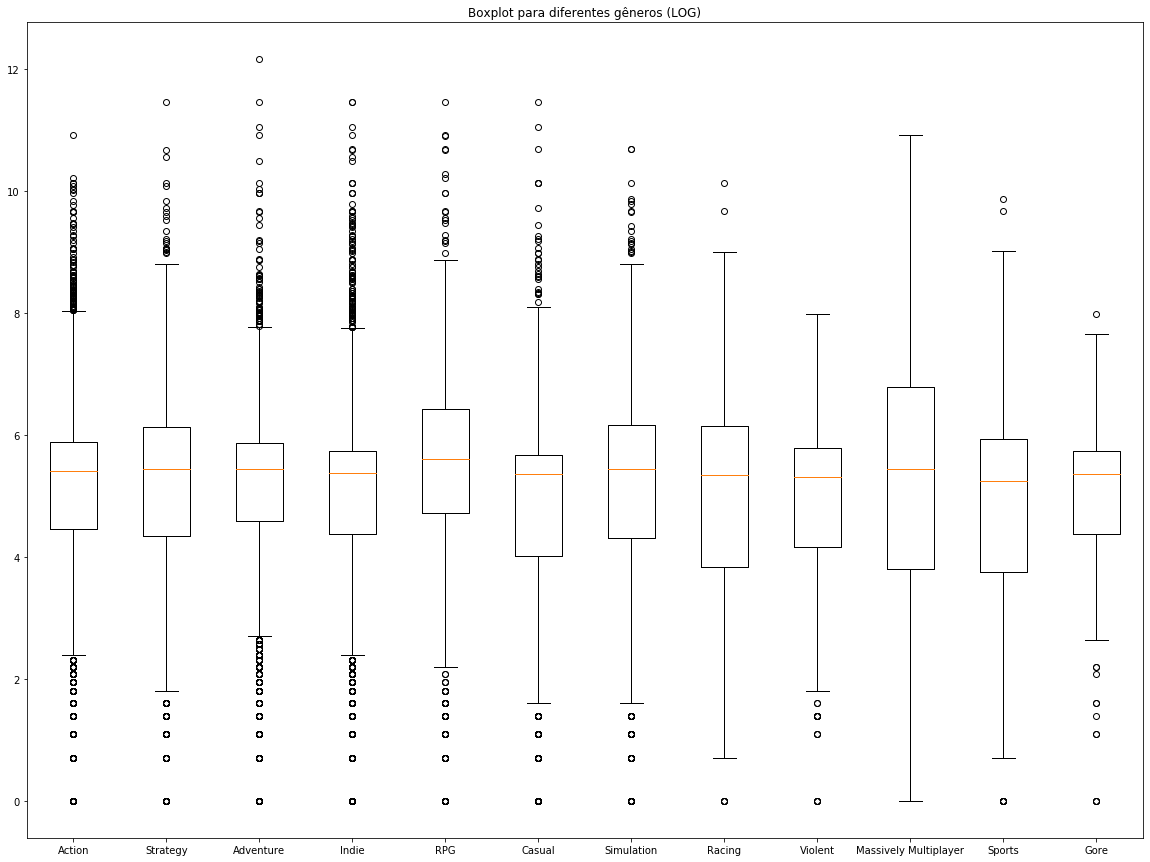

In [13]:
t_medio["log_average_playtime"] = np.log(t_medio["average_playtime"].loc[t_medio["average_playtime"]>0])
data = [t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].log_average_playtime for i in lista_generos]
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Boxplot para diferentes gêneros (LOG)')
ax.boxplot(data, labels = lista_generos)
plt.show()

# Tempo de jogo médio por gênero:

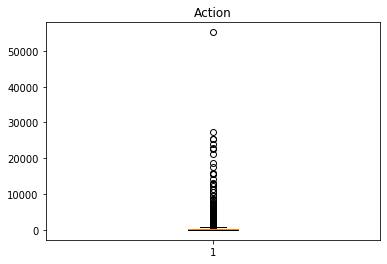

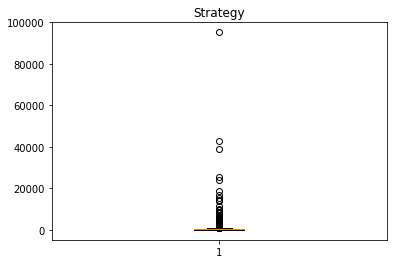

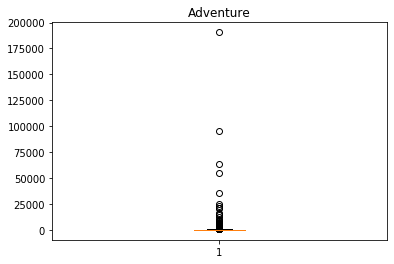

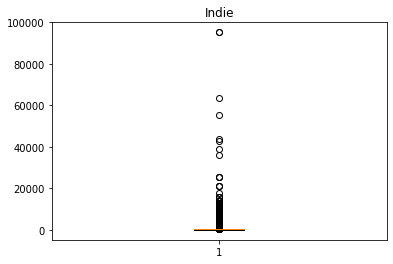

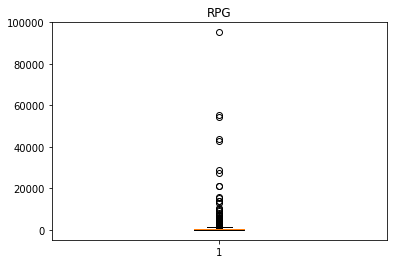

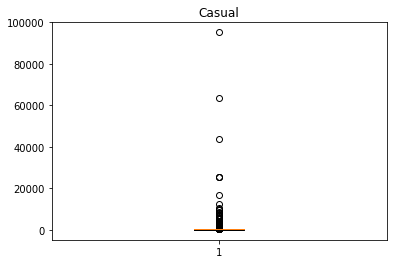

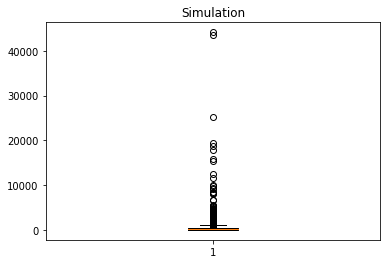

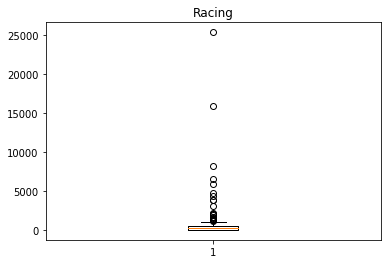

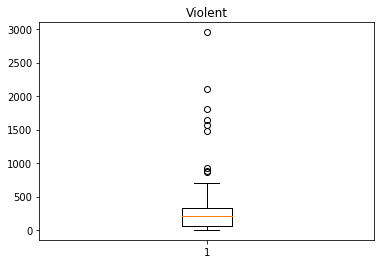

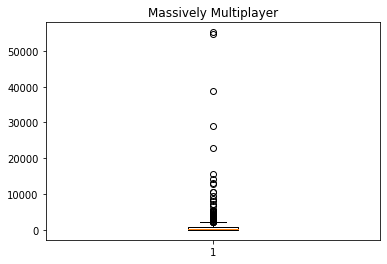

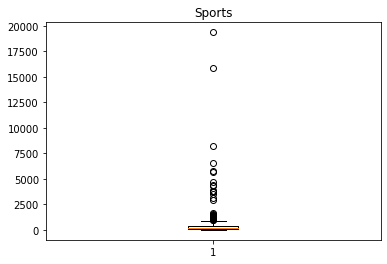

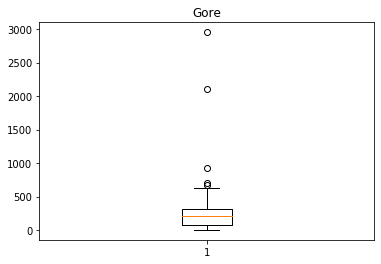

In [14]:
for i in lista_generos:
    plt.boxplot(t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].average_playtime)
    plt.title(i)
    plt.show()

# Log Tempo de jogo médio por gênero:

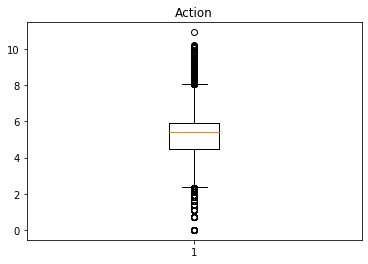

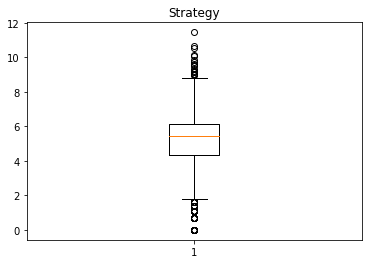

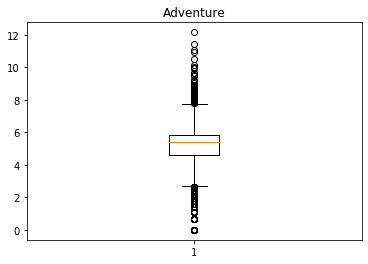

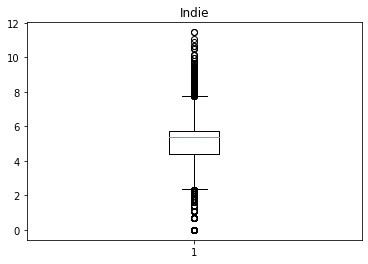

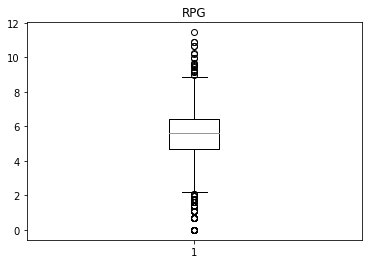

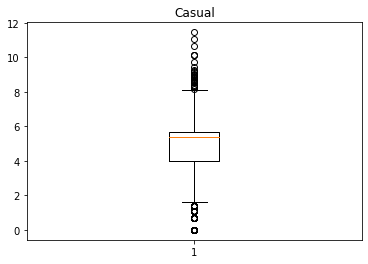

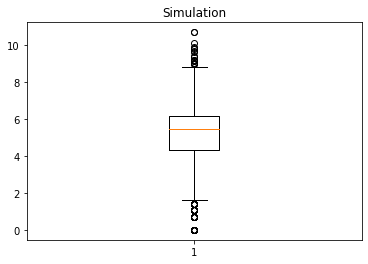

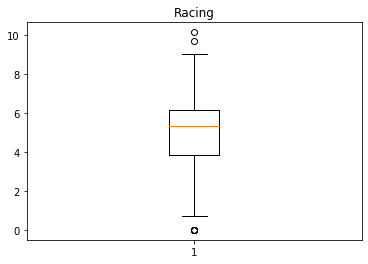

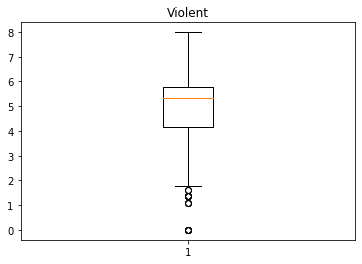

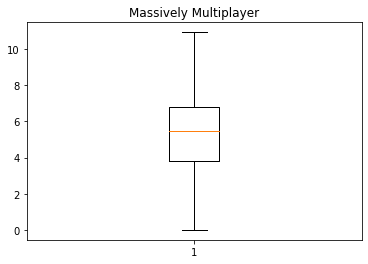

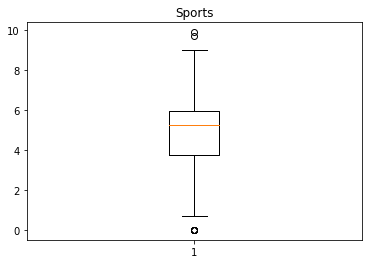

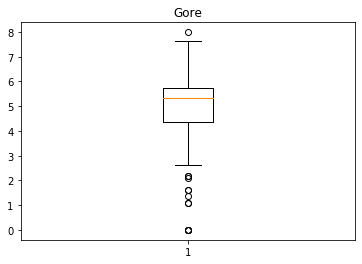

In [15]:
for i in lista_generos:
    
    plt.boxplot(t_medio.loc[(t_medio.genres.str.contains(i)) & (t_medio.average_playtime > 0)].log_average_playtime)
    plt.title(i)
    plt.show()

Quantos outliers por gênero?

# Jogadores por gênero

In [16]:
faixas = []
intervalo = []
jogadores=excel_only_jogos
valores = jogadores.owners.unique()
for i in valores:
    intervalo = i
    intervalo = intervalo.split("-")
    faixas.append(intervalo[0])
    faixas.append(intervalo[-1])
faixas = list(map(int, set(faixas)))
faixas.sort()

In [17]:
compradores = []

for i in jogadores.owners:
#     print(i)
    
    if i == "0-20000":
        compradores.append(np.log10(10000))
    elif i == '200000-500000':
        compradores.append(np.log10(350000))
    elif i == '1000000-2000000':
        compradores.append(np.log10(1500000))
    elif i == '50000-100000':
        compradores.append(np.log10(75000))
    elif i == '100000-200000':
        compradores.append(np.log10(150000))
    elif i == '500000-1000000':
        compradores.append(np.log10(750000))
    elif i == '20000-50000':
        compradores.append(np.log10(35000))
    elif i == '50000000-100000000':
        compradores.append(np.log10(75000000))
    elif i == '100000000-200000000':
        compradores.append(np.log10(150000000))
    elif i == '20000000-50000000':
        compradores.append(np.log10(35000000))
    elif i == '2000000-5000000':
        compradores.append(np.log10(3500000))
    elif i == '10000000-20000000':
        compradores.append(np.log10(15000000))
    else:
        compradores.append(np.log10(7500000))
jogadores["compradores"] = compradores

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
jogadores.dropna()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,median_playtime,owners,price,ratings,Percent_positive,Percent_negative,Idade,n_cat,log_average_playtime,compradores
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,317,10000000-20000000,7.19,127873,0.973888,0.026112,19,4.0,9.776336,7.176091
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,62,5000000-10000000,3.99,3951,0.839787,0.160213,20,4.0,5.624018,6.875061
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,34,5000000-10000000,3.99,3814,0.895648,0.104352,16,2.0,5.231109,6.875061
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,184,5000000-10000000,3.99,1540,0.826623,0.173377,18,4.0,5.552960,6.875061
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,415,5000000-10000000,3.99,5538,0.947996,0.052004,20,3.0,6.436150,6.875061
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,...,10,5000000-10000000,3.99,3442,0.801278,0.198722,19,3.0,5.164786,6.875061
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,...,83,5000000-10000000,7.19,28855,0.961878,0.038122,21,5.0,7.170120,6.875061
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,43,10000000-20000000,7.19,13559,0.893871,0.106129,15,3.0,6.056784,7.176091
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,...,205,5000000-10000000,3.99,4242,0.900990,0.099010,18,1.0,5.888878,6.875061
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,...,402,10000000-20000000,7.19,70321,0.965601,0.034399,15,7.0,6.538140,7.176091


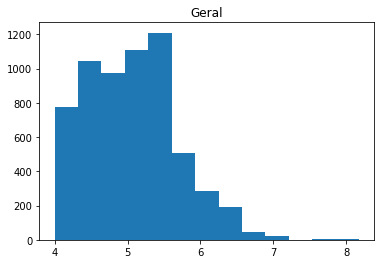

In [19]:
plt.hist(jogadores.compradores, bins=13)
plt.title("Geral")
plt.show()

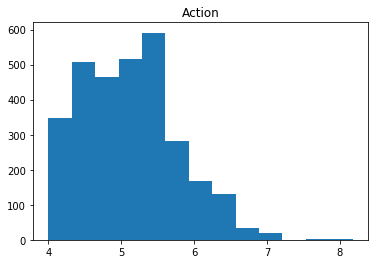

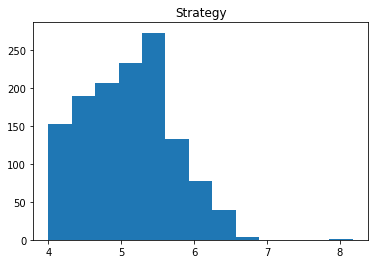

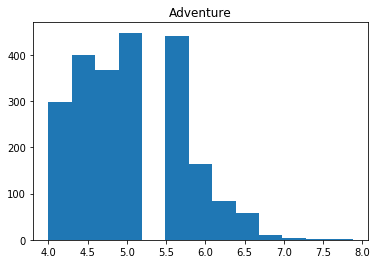

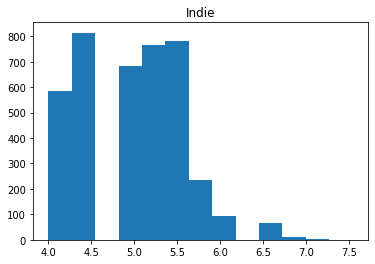

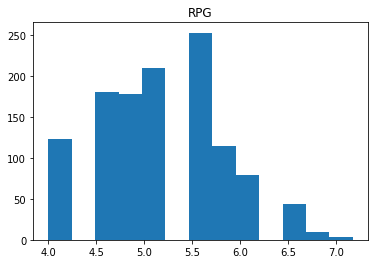

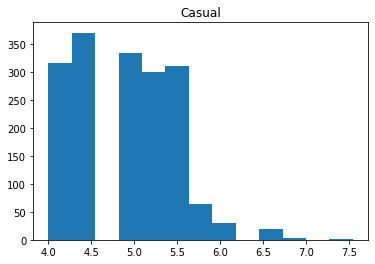

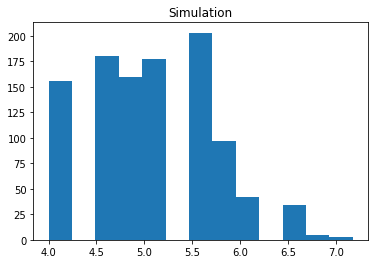

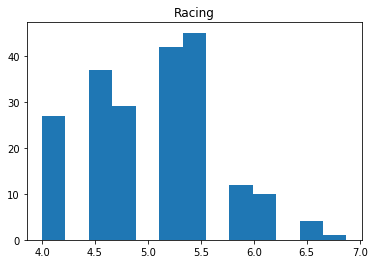

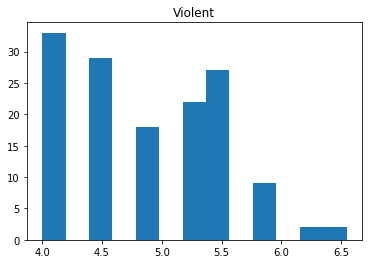

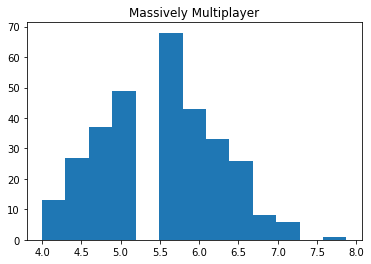

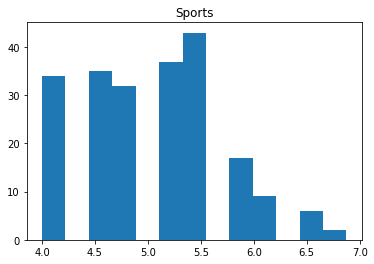

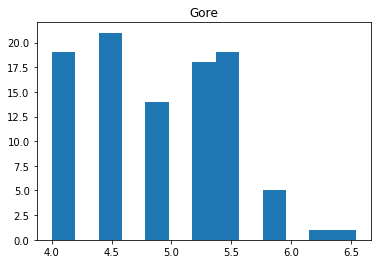

In [20]:
for i in lista_generos:
    plt.hist(jogadores.loc[jogadores.genres.str.contains(i)].compradores, bins = 13)
    plt.title(i)
    plt.show()

# Separando Variáveis em grupos

Jutando variáveis que demonstram uma mesma qualidade em grupos

In [21]:
excel_only_jogos

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,median_playtime,owners,price,ratings,Percent_positive,Percent_negative,Idade,n_cat,log_average_playtime,compradores
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,317,10000000-20000000,7.19,127873,0.973888,0.026112,19,4.0,9.776336,7.176091
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,62,5000000-10000000,3.99,3951,0.839787,0.160213,20,4.0,5.624018,6.875061
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,34,5000000-10000000,3.99,3814,0.895648,0.104352,16,2.0,5.231109,6.875061
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,184,5000000-10000000,3.99,1540,0.826623,0.173377,18,4.0,5.552960,6.875061
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,415,5000000-10000000,3.99,5538,0.947996,0.052004,20,3.0,6.436150,6.875061
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,...,10,5000000-10000000,3.99,3442,0.801278,0.198722,19,3.0,5.164786,6.875061
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,...,83,5000000-10000000,7.19,28855,0.961878,0.038122,21,5.0,7.170120,6.875061
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,43,10000000-20000000,7.19,13559,0.893871,0.106129,15,3.0,6.056784,7.176091
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,...,205,5000000-10000000,3.99,4242,0.900990,0.099010,18,1.0,5.888878,6.875061
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,...,402,10000000-20000000,7.19,70321,0.965601,0.034399,15,7.0,6.538140,7.176091


### Tempo de jogo

In [22]:
excel_only_jogos.loc[:,["name","average_playtime","median_playtime"]]

,name,average_playtime,median_playtime
0,Counter-Strike,17612,317
1,Team Fortress Classic,277,62
2,Day of Defeat,187,34
3,Deathmatch Classic,258,184
4,Half-Life: Opposing Force,624,415
5,Ricochet,175,10
6,Half-Life,1300,83
7,Counter-Strike: Condition Zero,427,43
8,Half-Life: Blue Shift,361,205
9,Half-Life 2,691,402


### Ratings

In [23]:
excel_only_jogos.loc[:,["name", "positive_ratings", "negative_ratings", "ratings", "per_rating"]]

C:\Users\marce\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,name,positive_ratings,negative_ratings,ratings,per_rating
0,Counter-Strike,124534,3339,127873,NaN
1,Team Fortress Classic,3318,633,3951,NaN
2,Day of Defeat,3416,398,3814,NaN
3,Deathmatch Classic,1273,267,1540,NaN
4,Half-Life: Opposing Force,5250,288,5538,NaN
5,Ricochet,2758,684,3442,NaN
6,Half-Life,27755,1100,28855,NaN
7,Counter-Strike: Condition Zero,12120,1439,13559,NaN
8,Half-Life: Blue Shift,3822,420,4242,NaN
9,Half-Life 2,67902,2419,70321,NaN


### Preço

In [24]:
excel_only_jogos.loc[:,["name", "price"]]

,name,price
0,Counter-Strike,7.19
1,Team Fortress Classic,3.99
2,Day of Defeat,3.99
3,Deathmatch Classic,3.99
4,Half-Life: Opposing Force,3.99
5,Ricochet,3.99
6,Half-Life,7.19
7,Counter-Strike: Condition Zero,7.19
8,Half-Life: Blue Shift,3.99
9,Half-Life 2,7.19


### Identificação

In [25]:
excel_only_jogos.loc[:,["name", "developer", "publisher", "release_date","platforms", "required_age", "genres", "categories", "n_cat"]]

,name,developer,publisher,release_date,platforms,required_age,genres,categories,n_cat
0,Counter-Strike,Valve,Valve,2000-11-01,windows;mac;linux,0,Action,Multi-player;Online Multi-Player;Local Multi-P...,4.0
1,Team Fortress Classic,Valve,Valve,1999-04-01,windows;mac;linux,0,Action,Multi-player;Online Multi-Player;Local Multi-P...,4.0
2,Day of Defeat,Valve,Valve,2003-05-01,windows;mac;linux,0,Action,Multi-player;Valve Anti-Cheat enabled,2.0
3,Deathmatch Classic,Valve,Valve,2001-06-01,windows;mac;linux,0,Action,Multi-player;Online Multi-Player;Local Multi-P...,4.0
4,Half-Life: Opposing Force,Gearbox Software,Valve,1999-11-01,windows;mac;linux,0,Action,Single-player;Multi-player;Valve Anti-Cheat en...,3.0
5,Ricochet,Valve,Valve,2000-11-01,windows;mac;linux,0,Action,Multi-player;Online Multi-Player;Valve Anti-Ch...,3.0
6,Half-Life,Valve,Valve,1998-11-08,windows;mac;linux,0,Action,Single-player;Multi-player;Online Multi-Player...,5.0
7,Counter-Strike: Condition Zero,Valve,Valve,2004-03-01,windows;mac;linux,0,Action,Single-player;Multi-player;Valve Anti-Cheat en...,3.0
8,Half-Life: Blue Shift,Gearbox Software,Valve,2001-06-01,windows;mac;linux,0,Action,Single-player,1.0
9,Half-Life 2,Valve,Valve,2004-11-16,windows;mac;linux,0,Action,Single-player;Steam Achievements;Steam Trading...,7.0


### Compradores

In [26]:
excel_only_jogos.loc[:, ["name", "owners"]]

,name,owners
0,Counter-Strike,10000000-20000000
1,Team Fortress Classic,5000000-10000000
2,Day of Defeat,5000000-10000000
3,Deathmatch Classic,5000000-10000000
4,Half-Life: Opposing Force,5000000-10000000
5,Ricochet,5000000-10000000
6,Half-Life,5000000-10000000
7,Counter-Strike: Condition Zero,10000000-20000000
8,Half-Life: Blue Shift,5000000-10000000
9,Half-Life 2,10000000-20000000


### Plot dos scatters do Preço com o Percent_Positive (Feedback)

In [27]:
#multilinear regression

A correlação entre  é de 0.1834043695785418


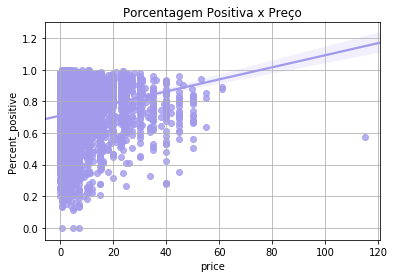

In [28]:
# plt.scatter(excel_only_jogos["price"],excel_only_jogos["Percent_positive"], c = 'r')
#excel_only_jogos.plot.scatter(x='price',y='Percent_positive', loglog = False, c ="r")
sns.regplot(excel_only_jogos["price"],excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Preço")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['price'].corr(excel_only_jogos['Percent_positive']))

### Plot dos scatters do n_cat com o Percent_Positive (Feedback)

A correlação entre  é de 0.1697235960146996


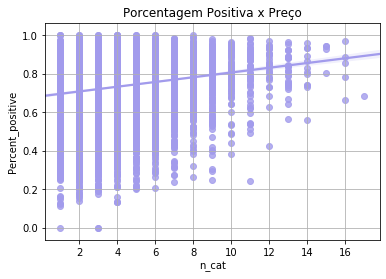

In [29]:
#plt.scatter(excel_only_jogos["n_cat"],excel_only_jogos["Percent_positive"])
sns.regplot(excel_only_jogos["n_cat"],excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Preço")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['n_cat'].corr(excel_only_jogos['Percent_positive']))

### Plot dos scatters do average_playtime com o Percent_Positive (Feedback)

A correlação entre  é de 0.02040412184987603


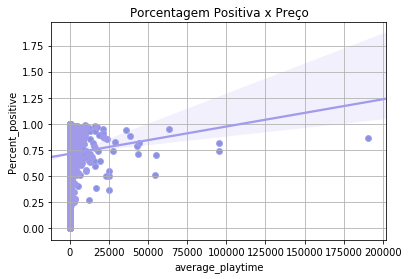

In [43]:
excel_only_jogos.plot.scatter(x='average_playtime',y='Percent_positive', loglog = False);
sns.regplot(excel_only_jogos["average_playtime"],excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Preço")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['average_playtime'].corr(excel_only_jogos['Percent_positive']))

### Plot dos scatters do median_playtime com o Percent_Positive (Feedback)

A correlação entre  é de 0.019249278164102126


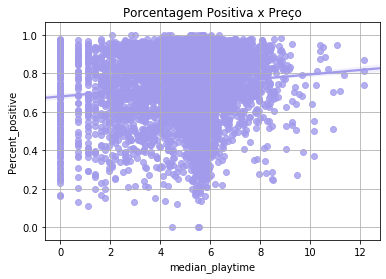

In [31]:
sns.regplot(np.log(excel_only_jogos["median_playtime"]),excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Preço")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['median_playtime'].corr(excel_only_jogos['Percent_positive']))

### Plot dos scatters da Idade de jogo com o Percent_Positive (Feedback)

A correlação entre  é de 0.1213310972377113


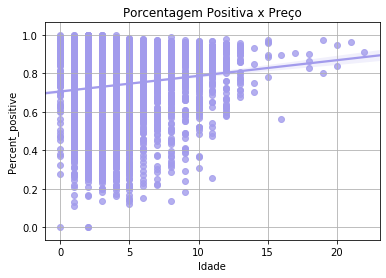

In [32]:
sns.regplot(excel_only_jogos["Idade"],excel_only_jogos["Percent_positive"], color=('#a29bec'))
plt.title("Porcentagem Positiva x Preço")
plt.grid(True)
print('A correlação entre  é de', excel_only_jogos['Idade'].corr(excel_only_jogos['Percent_positive']))

# Regressão linear

De acordo com os scatters, percebe-se que as variaveis median_playtime e average_playtime não tem uma boa correlação. Para isso, eles não serão considerados na regressão linear

In [33]:
excel_only_jogos = excel_only_jogos.dropna()
X_num1 = excel_only_jogos[["price", "n_cat", "Idade"]]
y = excel_only_jogos["Percent_positive"]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_num1, y, test_size=0.2)

In [35]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [36]:
reg.score(X_test, y_test)

0.05013544550568372

In [37]:
reg.coef_

array([0.00333092, 0.01102464, 0.01022038])

In [38]:
reg.intercept_

0.6234458713026653

# RandomForestRegressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

reg_ff = RandomForestRegressor(n_estimators=100, random_state=42)
reg_ff.fit(X_train, y_train)
reg_ff.score(X_test, y_test)

0.005421814100870059